<h1><center>
    ECE 438 - Laboratory 6a<br/>
    Discrete Fourier Transform and Fast Fourier Transform Algorithms (Week 1)<br/>
    <small>Last updated on February 22, 2022</small><br/>
    <br/>
    Date:2/23<br/>
    Section:<br/>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 Ruixiang Wang| | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Understanding the effects of truncating the signal on its DTFT (20 pts)**: *Magnitude and phase plots, hamming/rect windows, questions*||||
|**Implementation of DFT and inverse DFT (40 pts)**: *Python codes, frequency and time-domain plots, analytical expressions*||||
|**Implementation of DFT and IDFT using matrix multiplication (30 pts)**: *Matrices A,B,C, matlab codes, plots, questions*||||
|**Computation time comparison (10 pts)**: *Runtimes, questions*||||

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helper import DTFT, hamming
import time

In [2]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<h3 style="color:red;"><left>Exercise 2: Windowing Effects</left></h3>

**1. Plot the magnitude of $W(e^{j\omega})$, using equations (10) and (11).**

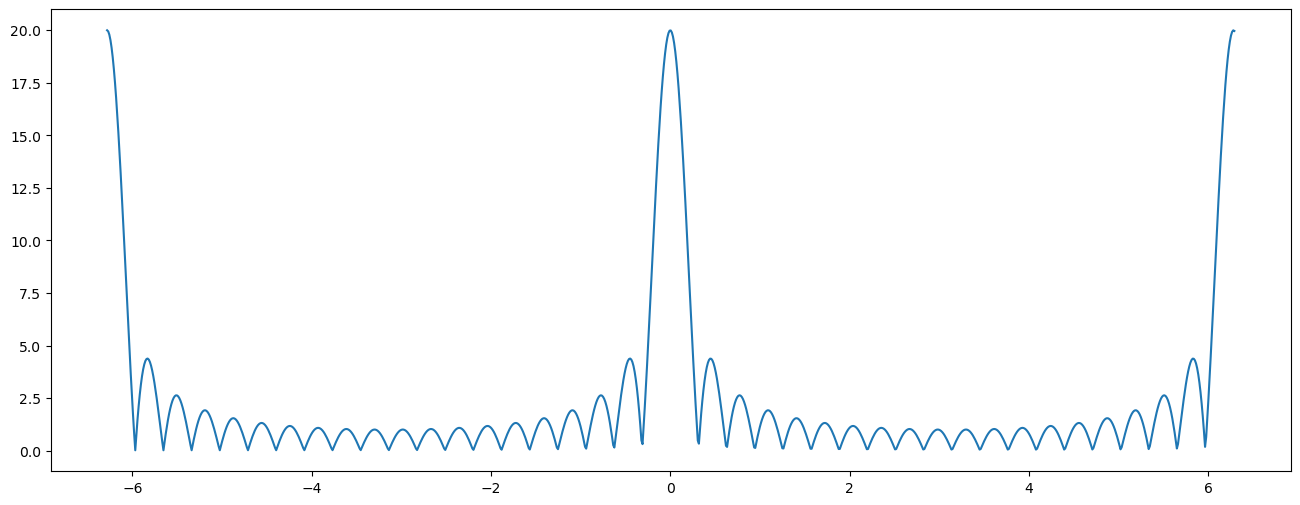

In [3]:
N = 20

w = np.linspace(-2*np.pi, 2*np.pi+0.01, 1001)
W = [0]*len(w)

W[0] = N
W[N] = N

for i in range(1, len(w), 1):
    W[i] = np.exp(-1j*w[i]*(N-1)/2)*np.sin(w[i]*N/2)/np.sin(w[i]/2)
    
plt.plot(w, np.abs(W))

**2. Plot the phase of $W(e^{j\omega})$, using equations (10) and (11).**

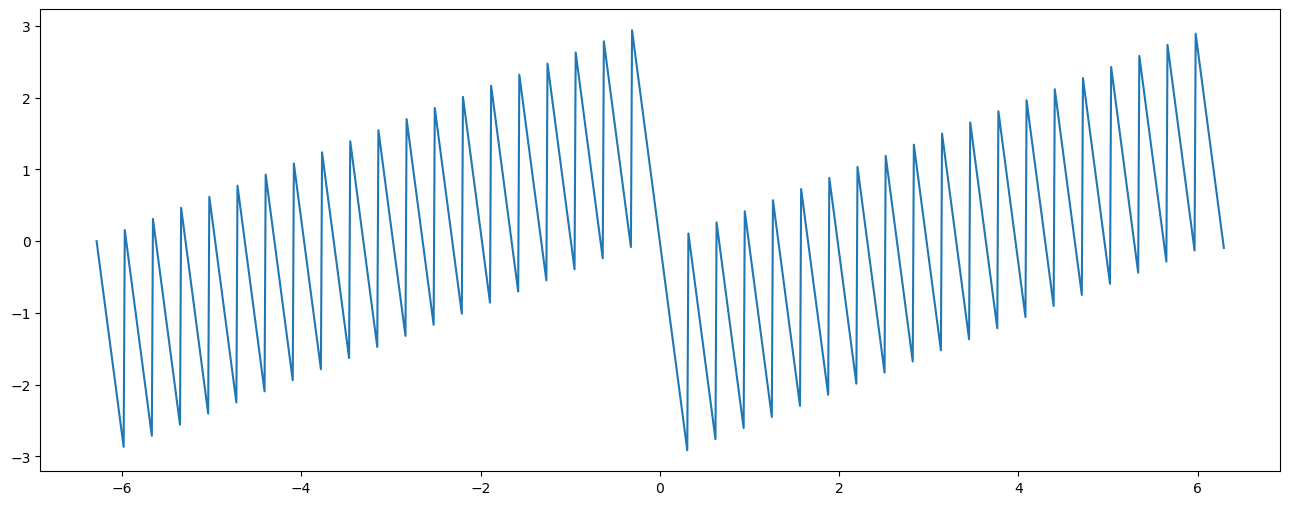

In [4]:
plt.plot(w, np.angle(W))


**3. Determine an analytical expression for $X(e^{j\omega})$ (the DTFT of the non-truncated signal).**

<img src="2.3.png">

**4. Truncate the signal $x[n]$ using a window of size $N = 20$ and then use ```DTFT``` to compute $X_{\text{tr}}(e^{j\omega})$. Then plot the magnitude of $X_{\text{tr}}(e^{j\omega})$. Make sure that the plot contains a least 512 points.**

**Hint:** Use the command ```X, w = DTFT(x, 512)```.

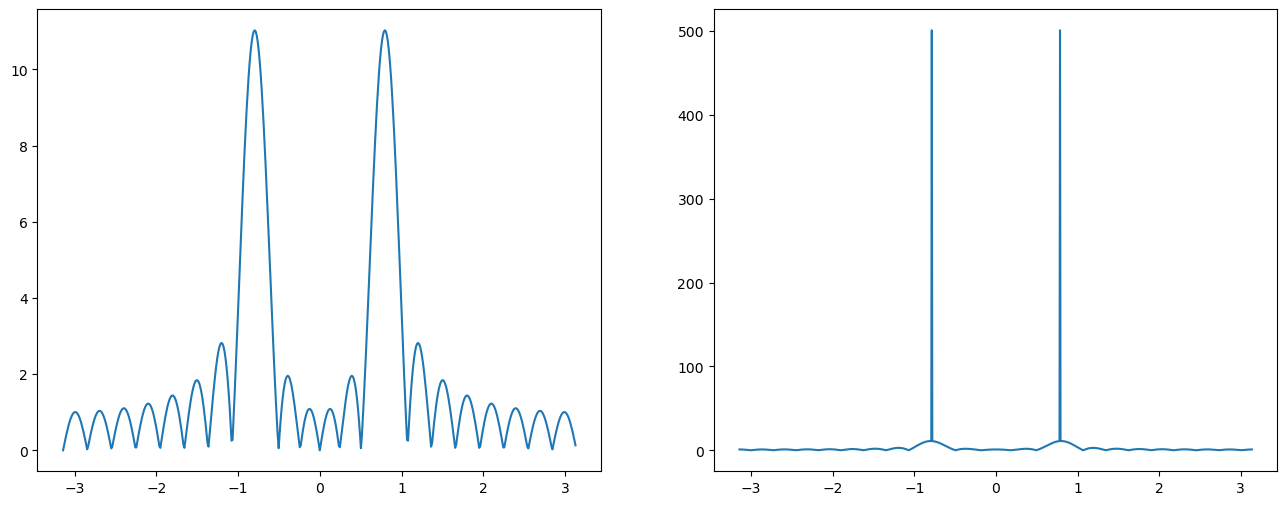

In [5]:
n = np.linspace(0, N, N+1)
n1 = np.linspace(0, 1000, 1001)

x = np.cos(np.pi/4*n1)
xtr = np.cos(np.pi/4*n)

X, w1 = DTFT(x, 512)
Xtr, w = DTFT(xtr, 512)

plt.subplot(1,2,1)
plt.plot(w, np.abs(Xtr))

plt.subplot(1,2,2)
plt.plot(w1, np.abs(X))

**5. Describe the difference between $|X_{\text{tr}}(e^{j\omega})$ and $|X(e^{j\omega})|$. What is the reason for this difference?**

The width of each lobe are bigger when X is truncated. It is bigger because it's convolved with a rectangular window.

**6. What would you expect your plots to look like if you had used a Hamming window in place of the truncation (rectangular) window? (See Fig. 1 for a plot of a Hamming window of length 20 and its DTFT.) Submit the plot of the magnitude of the DTFT of the signal $x[n]$ windowed using a Hamming window. (Hint: The Python command for a Hamming window is `hamming(N)`.)**

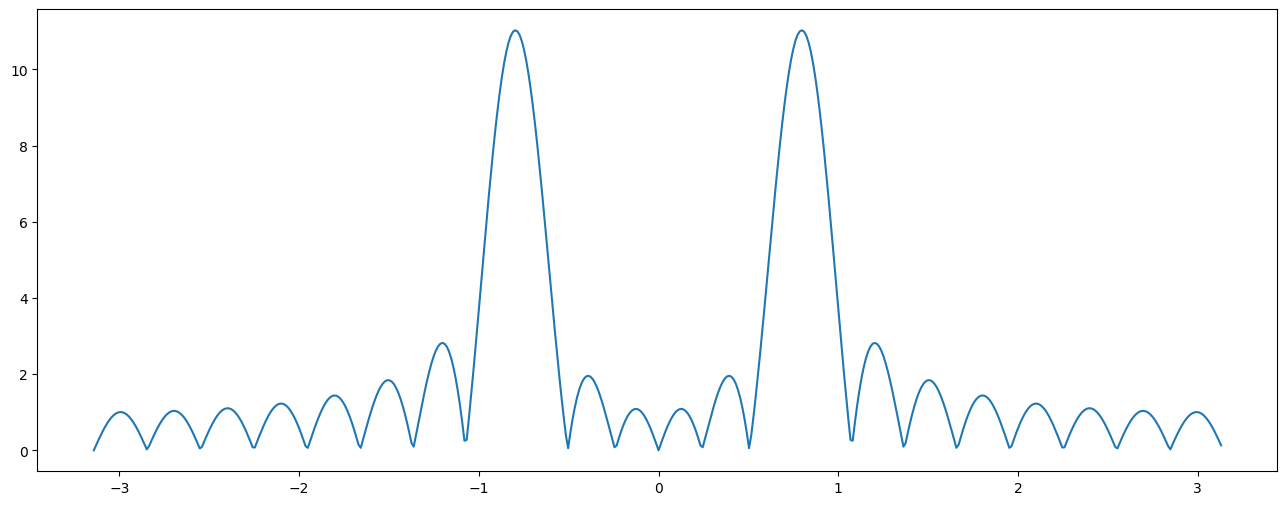

In [6]:
n = np.linspace(0, N, N+1)

h = hamming(N+1)
xtr_h = h*np.cos(np.pi/4*n)

Xtr_h, w = DTFT(xtr, 512)

plt.plot(w, np.abs(Xtr_h))

**7. Comment on the effects of using a different window for $w[n]$.**

They are similar but sidelobe are reduced

<h3 style="color:red;"><left>Exercise 3.1: Computing the DFT</left></h3>

**1. Write your own Python function to implement the DFT of equation (3). Your routine should implement the DFT exactly as specified by (3) using *for-loops* for $n$ and $k$, and computing the exponentials as they appear.**

**Hint:** initialize `X` as a vector of complex values by using ```.astype(complex)```.

In [7]:
def DFTsum(x):
    """
    Parameters:
    ---
    x: the input signal, an N point vector contining the values x[0], ..., x[N - 1]
    
    Returns:
    ---
    X: the DFT of x
    """
    
    X = [0]*len(x)
    for k in range(0, len(x)):
        for n in range(0, len(x)):
            X[k] += (x[n]*np.exp(-1j*2*np.pi*n*k/len(x))).astype(complex)
    
    
    return X

**2. Test your routine ```DFTsum``` by computing $X_N(k)$ for each of the following cases:**

* $x(n)=\delta(n)\quad\text{for }N=10$
* $x(n)=1\quad\text{for }N=10$
* $x(n)=e^{j2\pi n/10}\quad\text{for }N=10$
* $x(n)=\cos(2\pi n/10)\quad\text{for }N=10$

**and plot the magnitude of each of the DFT’s.**

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


<StemContainer object of 3 artists>

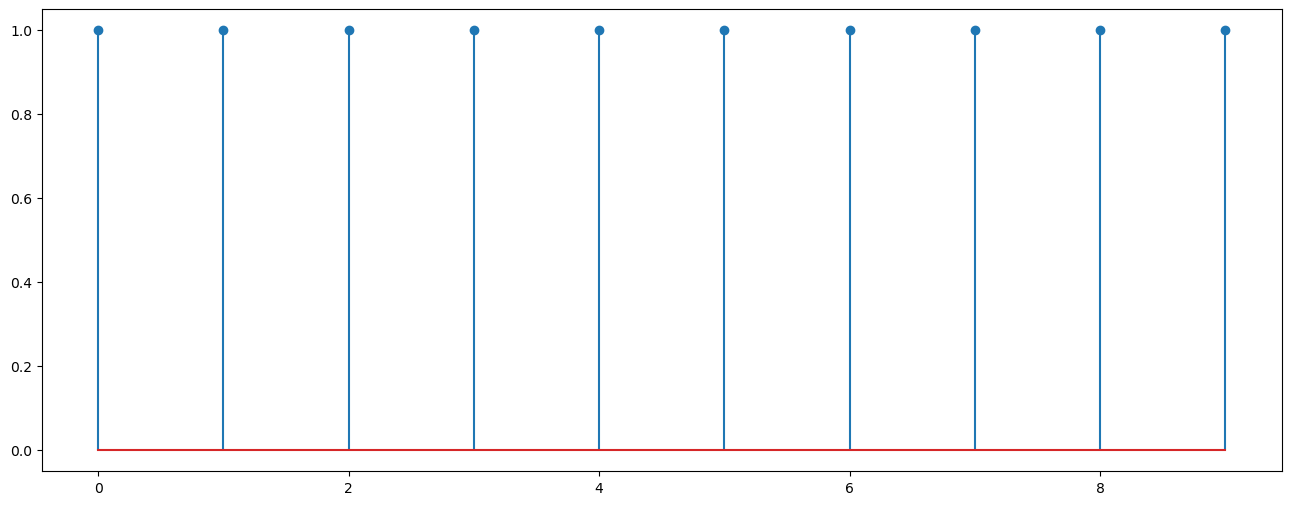

In [8]:
N = 10
n = np.linspace(0, N-1, N)
print(n)
x1 = [0]*len(n)
x1[0] = 1
X1 = DFTsum(x1)
w = np.linspace(0, len(X1)-1, len(X1))

plt.stem(w, np.abs(X1))

<StemContainer object of 3 artists>

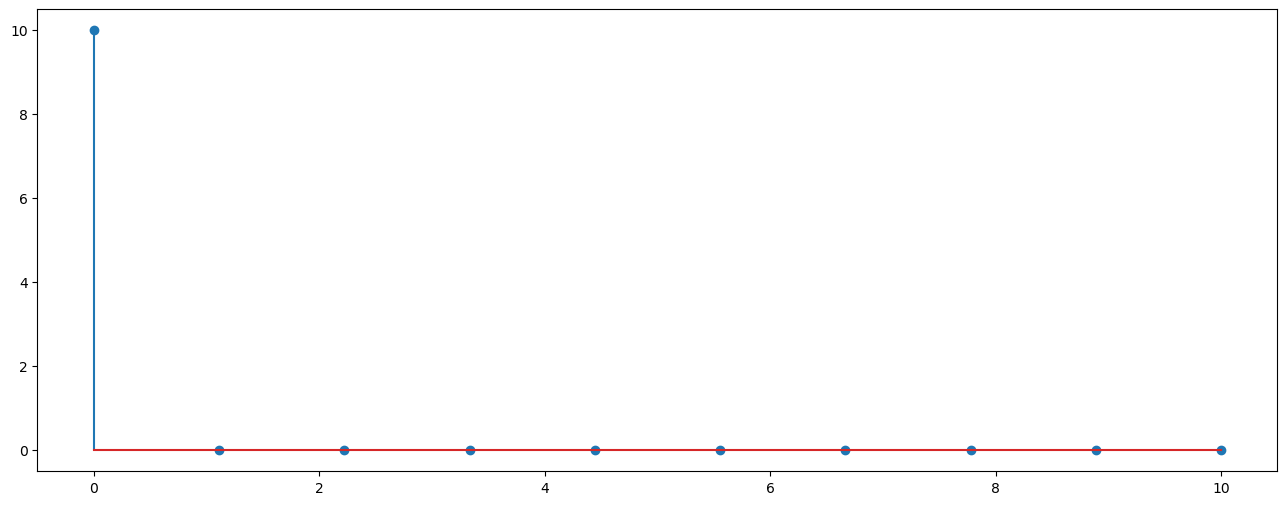

In [9]:
x2 = [1]*len(n)
X2 = DFTsum(x2)
w = np.linspace(0, len(X2), len(X2))

plt.stem(w, np.abs(X2))


<StemContainer object of 3 artists>

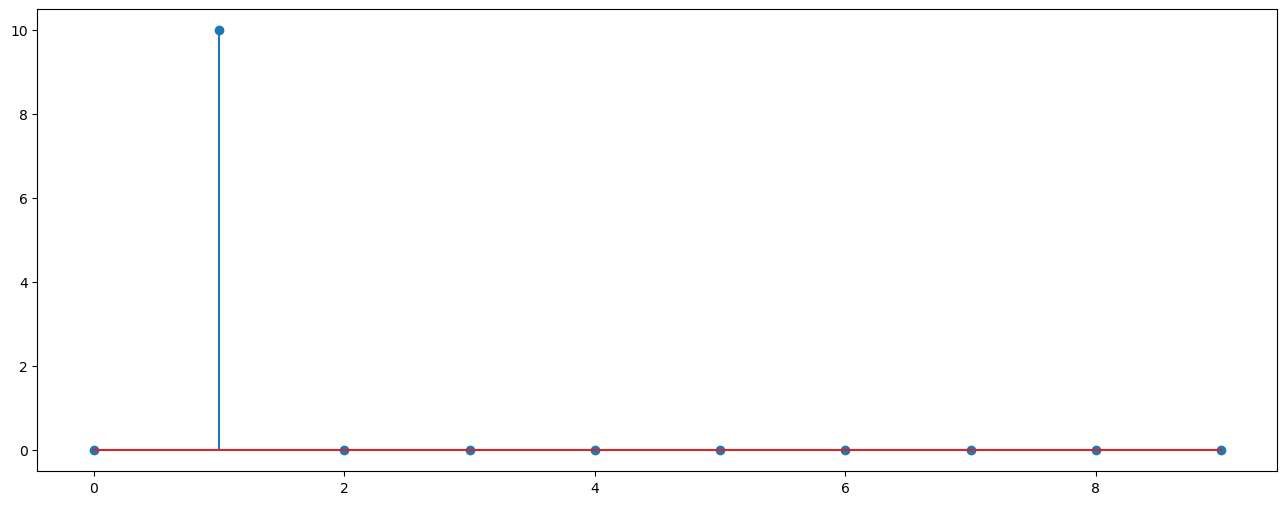

In [10]:
x3 = np.exp(1j*2*np.pi*n/10)
X3 = DFTsum(x3)
w = np.linspace(0, len(X3)-1, len(X3))
plt.stem(w, np.abs(X3))

<StemContainer object of 3 artists>

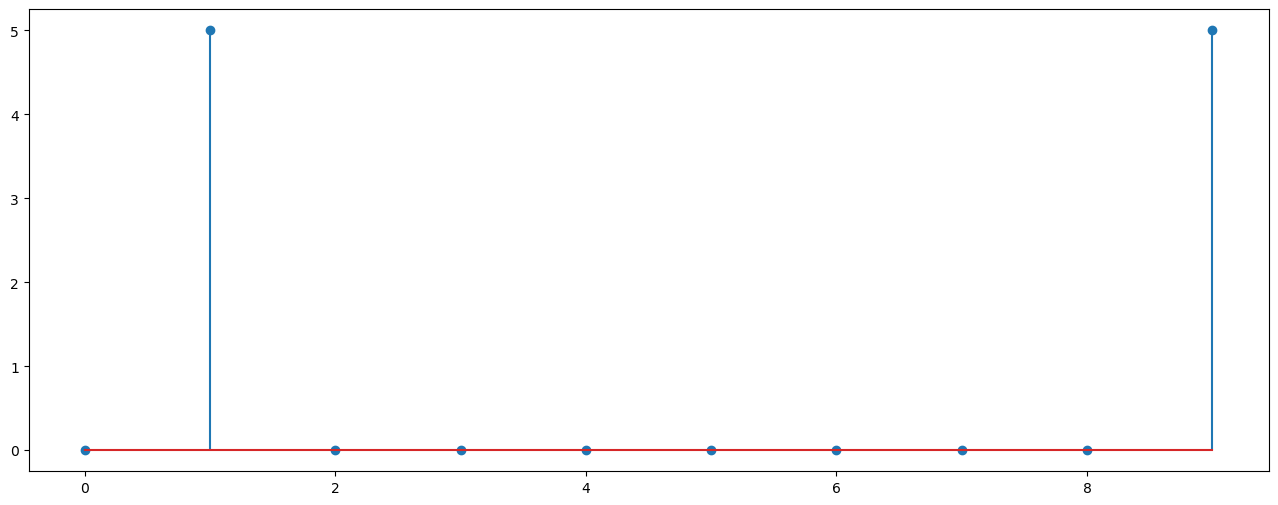

In [11]:
x4 = np.cos(2*np.pi*n/10)
X4 = DFTsum(x4)
w = np.linspace(0, len(X4)-1, len(X4))

plt.stem(w, np.abs(X4))



**3. Derive simple closed-form analytical expressions for the DFT (not the DTFT!) of each signal.**

X1 = 1
X2 = sigma(k)   [note:impulse at k]
X3 = sigma(k-1)
X4 = sigma(k-1) + sigma(k-10)

<h3 style="color:red;"><left>Exercise 3.2: Computing the Inverse DFT</left></h3>

**1. Write a Python function for computing the inverse DFT of (4).**

In [12]:
def IDFTsum(X):
    '''
    Parameters:
    ---
    X: the N point vector containing the DFT
    
    Returns:
    ---
    x: the corresponding time-domain signal
    '''
    
    x = [0]*len(X)
    for n in range(0, len(X)):
        for k in range(0, len(X)):
            x[n] += (X[k]*np.exp(1j*2*np.pi*n*k/len(x))/len(X)).astype(complex)

    return x

**2. Use ```IDFTsum``` to invert each of the DFT’s computed in the previous problem. Plot the magnitudes of the inverted DFT’s, and verify that those time-domain signals match the original ones. Use ```np.real()``` to eliminate any imaginary parts which roundoff error may produce.**

C:\Users\rxw14\anaconda3\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\rxw14\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<StemContainer object of 3 artists>

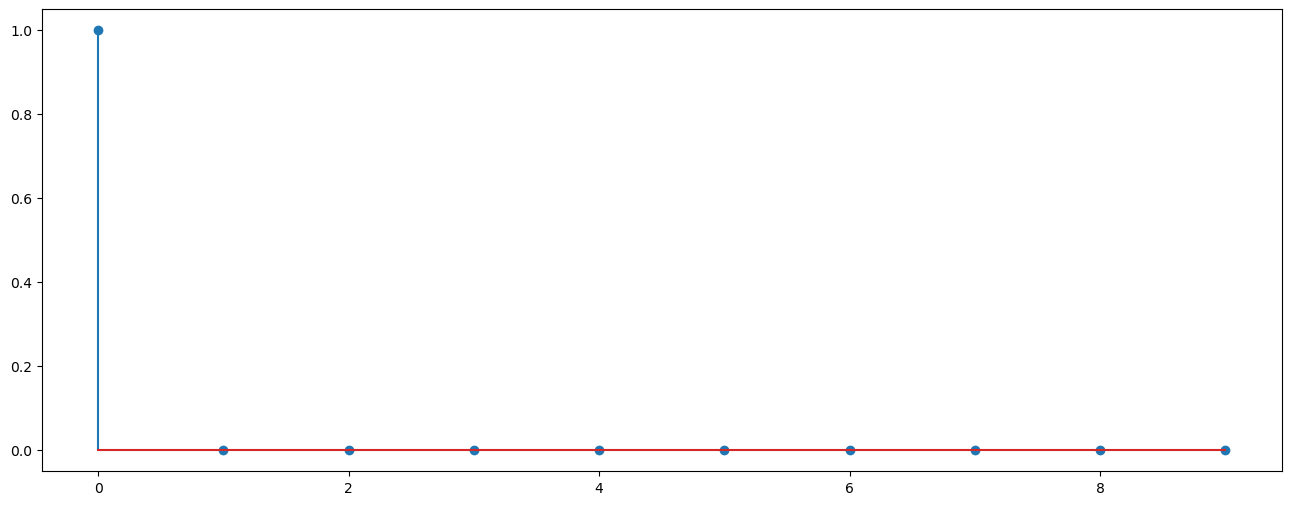

In [13]:
x1 = IDFTsum(X1)
w = np.linspace(0, len(x1)-1, len(x1))
plt.stem(w,x1)

<StemContainer object of 3 artists>

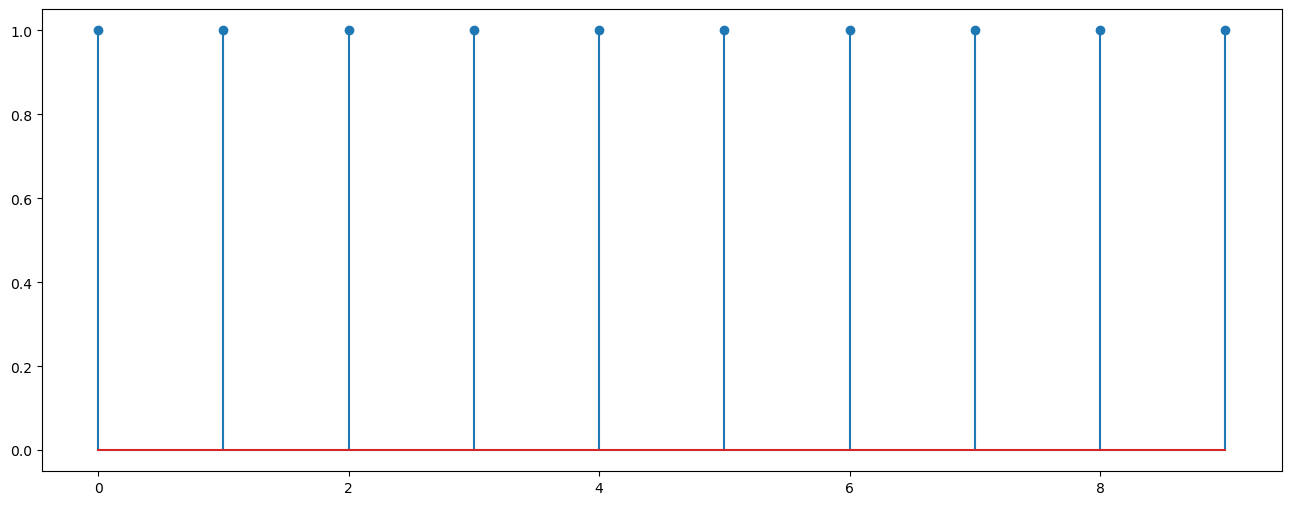

In [14]:
x2 = IDFTsum(X2)
w = np.linspace(0, len(x2)-1, len(x2))
plt.stem(w,x2)

<StemContainer object of 3 artists>

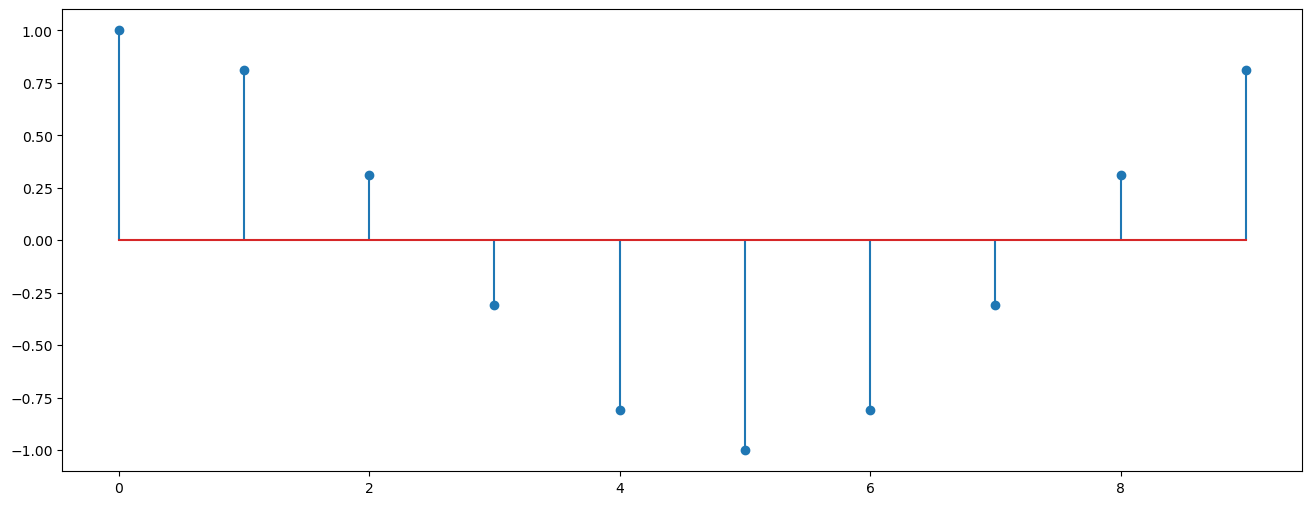

In [15]:
x3 = IDFTsum(X3)
w = np.linspace(0, len(x3)-1, len(x3))
plt.stem(w,x3)

<StemContainer object of 3 artists>

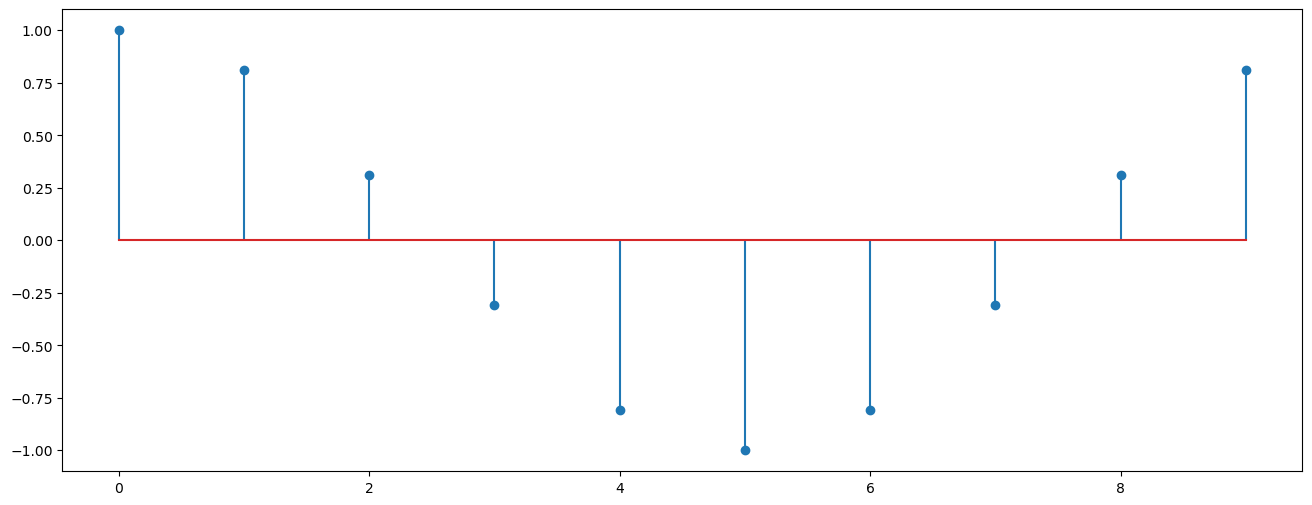

In [16]:
x4 = IDFTsum(X4)
w = np.linspace(0, len(x4)-1, len(x4))
plt.stem(w,x4)

<h3 style="color:red;"><left>Exercise 3.3: Matrix Representation of the DFT</left></h3>

**1. Write a Python function for computing the $N\times N$ DFT matrix $A$ in equation (16).**

In [17]:
def DFTmatrix(N):
    """
    Parameters:
    ---
    N: N point DFT
    
    Returns:
    ---
    A: an N x N DFT matrix
    """
    A = np.zeros((N,N)).astype(complex)
    
    for n in range(N):
        for k in range(N):
            A[k][n] = np.exp(-1j*2*np.pi*k*n/N)
    return A

**2. Print out the matrix $A$ for $N=5$.**

In [18]:
A1 = DFTmatrix(5)
print(A1)

[[ 1.        +0.j          1.        +0.j          1.        +0.j
   1.        +0.j          1.        +0.j        ]
 [ 1.        +0.j          0.30901699-0.95105652j -0.80901699-0.58778525j
  -0.80901699+0.58778525j  0.30901699+0.95105652j]
 [ 1.        +0.j         -0.80901699-0.58778525j  0.30901699+0.95105652j
   0.30901699-0.95105652j -0.80901699+0.58778525j]
 [ 1.        +0.j         -0.80901699+0.58778525j  0.30901699-0.95105652j
   0.30901699+0.95105652j -0.80901699-0.58778525j]
 [ 1.        +0.j          0.30901699+0.95105652j -0.80901699+0.58778525j
  -0.80901699-0.58778525j  0.30901699-0.95105652j]]


**3. Use the matrix $A$ to compute the DFT of the following signals.**

* $x(n)=\delta(n)\quad\text{for }N=10$
* $x(n)=1\quad\text{for }N=10$
* $x(n)=e^{j2\pi n/N}\quad\text{for }N=10$

In [26]:
x1 = [0]*10

x1[0] = 1

A1 = DFTmatrix(10)
X1 = A1*x1


N = 10
x2 = [0]*N
for n in range(0,N-1,1):
    x2[n] = 1

A2 = DFTmatrix(N)
X2 = A2*x2


N = 10
x3 = [0]*N
for n in range(0,N-1,1):
    x3[n] = np.exp(1j*2*np.pi*n/N)

A3 = DFTmatrix(N)
X3 = A3*x3

**4. Plot the magnitude plots of these 3 DFTs.**

<StemContainer object of 3 artists>

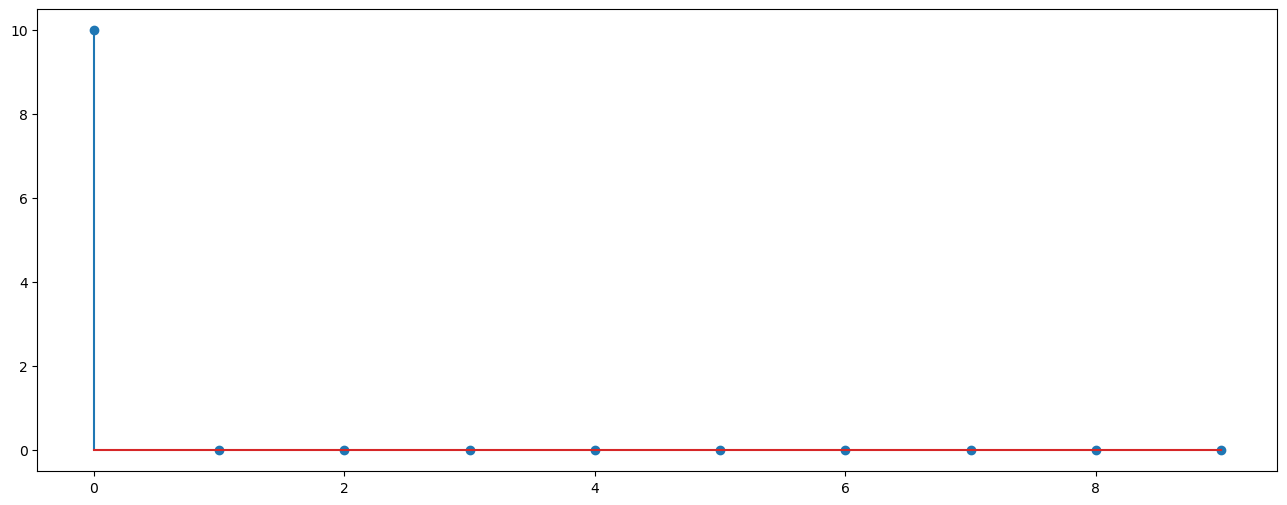

In [33]:
X1_mag = np.abs(X1)
X1_mag_arr = np.sum(X1_mag, axis=0)
n = np.linspace(0,9,10)

plt.stem(n, X1_mag_arr)

<StemContainer object of 3 artists>

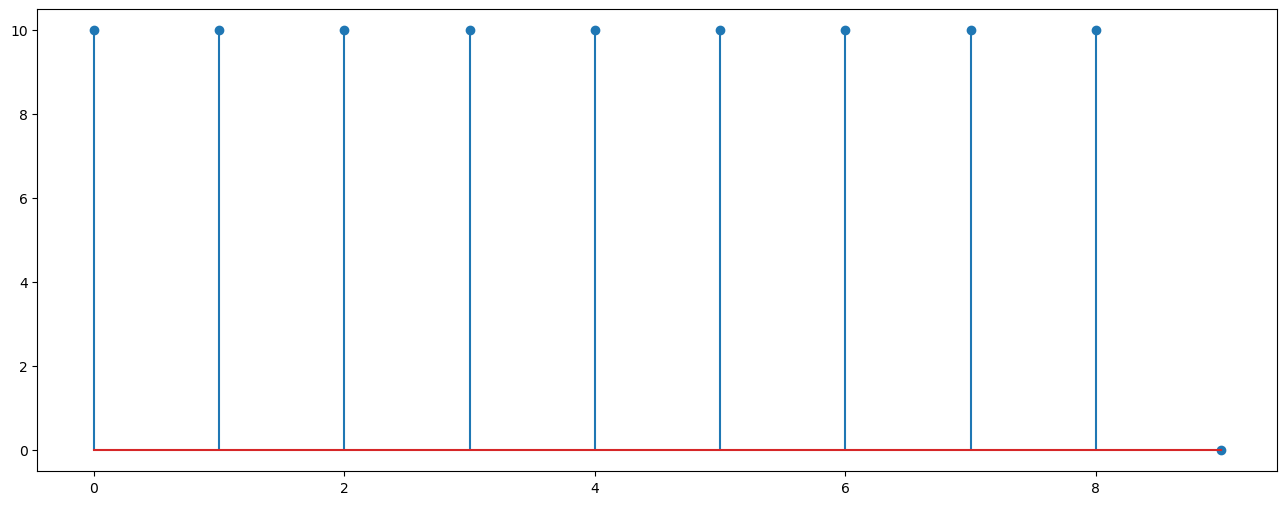

In [34]:
X2_mag = np.abs(X2)
X2_mag_arr = np.sum(X2_mag, axis=0)
n = np.linspace(0,9,10)

plt.stem(n, X2_mag_arr)


<StemContainer object of 3 artists>

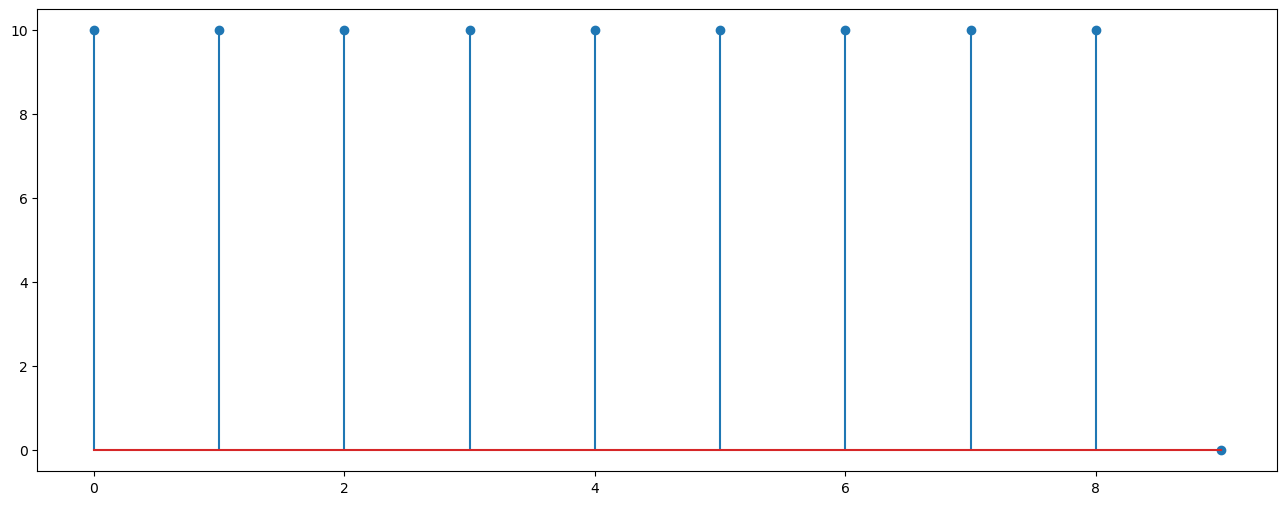

In [35]:
X3_mag = np.abs(X3)
X3_mag_arr = np.sum(X3_mag, axis=0)
n = np.linspace(0,9,10)

plt.stem(n, X3_mag_arr)



**5. How many multiplies are required to compute an $N$ point DFT using the matrix method (Consider a multiply as the multiplication of either complex or real numbers.)**

N^2

<h3 style="color:red;"><left>Exercise 3.4: Matrix Representation of the Inverse DFT</left></h3>

**1. Write an analytical expression for the elements of the inverse DFT matrix ```B```, using
the form of equation (16).**

B = e^(j*2*pi*k*n/N)/N

**2. Write a Python function for computing the $N\times N$ inverse DFT matrix $B$.**

In [36]:
def IDFTmatrix(N):
    """
    Parameters:
    ---
    N: N-point IDFT
    
    Returns:
    ---
    B: the N x N inverse DFT matrix
    """
    B = np.zeros((N,N)).astype(complex)
    
    for n in range(N):
        for k in range(N):
            B[k][n] = np.exp(1j*2*np.pi*k*n/N)/N
    return B

**3. Print out the matrix $B$ for $N=5$.**

In [37]:
B1 = IDFTmatrix(5)
print(B1)

[[ 0.2      +0.j          0.2      +0.j          0.2      +0.j
   0.2      +0.j          0.2      +0.j        ]
 [ 0.2      +0.j          0.0618034+0.1902113j  -0.1618034+0.11755705j
  -0.1618034-0.11755705j  0.0618034-0.1902113j ]
 [ 0.2      +0.j         -0.1618034+0.11755705j  0.0618034-0.1902113j
   0.0618034+0.1902113j  -0.1618034-0.11755705j]
 [ 0.2      +0.j         -0.1618034-0.11755705j  0.0618034+0.1902113j
   0.0618034-0.1902113j  -0.1618034+0.11755705j]
 [ 0.2      +0.j          0.0618034-0.1902113j  -0.1618034-0.11755705j
  -0.1618034+0.11755705j  0.0618034+0.1902113j ]]


**4. Compute the matrices $A$ for $N = 5$. Then compute and print out the elements of $C=BA$.**

In [40]:
A1 = DFTmatrix(5)

C = A1*B1

print(C)

[[0.2+0.0000000e+00j 0.2+0.0000000e+00j 0.2+0.0000000e+00j
  0.2+0.0000000e+00j 0.2+0.0000000e+00j]
 [0.2+0.0000000e+00j 0.2+0.0000000e+00j 0.2+0.0000000e+00j
  0.2+0.0000000e+00j 0.2+0.0000000e+00j]
 [0.2+0.0000000e+00j 0.2+0.0000000e+00j 0.2+0.0000000e+00j
  0.2+0.0000000e+00j 0.2+0.0000000e+00j]
 [0.2+0.0000000e+00j 0.2+0.0000000e+00j 0.2+0.0000000e+00j
  0.2-6.9388939e-18j 0.2+0.0000000e+00j]
 [0.2+0.0000000e+00j 0.2+0.0000000e+00j 0.2+0.0000000e+00j
  0.2+0.0000000e+00j 0.2+0.0000000e+00j]]


**5. What form does $C$ have? Why does it have this form?**

C is a constant matrix of 1/N. Because they are inverse of each other.

<h3 style="color:red;"><left>Exercise 3.5: Computation Time Comparison</left></h3>

**1. Compute the signal $x(n)=\cos(2\pi n/10)$ for $N=512$.**

In [43]:
n = np.linspace(0, 511, 512)

x = np.cos(2*np.pi*n/10)

**2. Compute the matrix $A$ for $N=512$.**

In [44]:
A = DFTmatrix(512)


**3. Compare the computation time of `DFTsum(x)` with a matrix implementation ```X = A.dot(x)``` by using the *time* function from *time* library before and after  the program execution (See the example below). Do not include the computation of $A$ in your timing calculations.**

**Report the time required for each of the two implementations.**

```python
t1 = time.time()
# program execution
t2 = time.time()
print(f"time taken: {t2 - t1:.4f}")
```

In [45]:
t1 = time.time()
X = DFTsum(x)
t2 = time.time()
print(f"time taken: {t2 - t1:.4f}")

t1 = time.time()
X = A.dot(x)
t2 = time.time()
print(f"time taken: {t2 - t1:.4f}")

time taken: 1.7816
time taken: 0.0110


**4. Which method is faster? Which method requires less storage?**

The matrix method is faster, but requires extra storage for matrix A